![example](images/director_shot.jpeg)

# Microsoft Movie Analysis

**Author:** Ethan Helder
***

# Outline
#### -Business Problem
#### -Data Understanding
#### -Data Preperation
#### -Data Modeling
#### -Evaluation
#### -Conclusion

## Overview

    Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. Using data recieved from movie review websites I descibe trends in amount grossed compared to different varibles in order to accuartely descibe how to make money in the movie industry.


## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Microsoft wants to get into the movie industry but doesnt know what to do in order to make money from it. I wanted to find out exactly what qualities allowed for a movie to make money so that I can approprietly advise what to do.
***

In [69]:
# Import standard packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests

%matplotlib inline

## Data Understanding

Describe the data being used for this project.
***
I recieved this data from movie review sites such as IMDB. The data represents individual movies; how much they made, what ratings they got, what genre they are from, length of movie runtime.
***

In [11]:
# Here you run your code to explore the data
movie_gross = pd.read_csv('''/Users/ethan/FlatironTasks/phase_1/project_1/
Microsoft-Movie-Analysis/data/zippedData/bom.movie_gross.csv.gz''')
title_basics = pd.read_csv('''/Users/ethan/FlatironTasks/phase_1/project_1/
Microsoft-Movie-Analysis/data/zippedData/imdb.title.basics.csv.gz''')
title_ratings = pd.read_csv('''/Users/ethan/FlatironTasks/phase_1/project_1/
Microsoft-Movie-Analysis/data/zippedData/imdb.title.ratings.csv.gz''')
# Pulls data from locally storred files

## Data Preparation

Describe and justify the process for preparing the data for analysis.
***
I removed the outliers and missing values while totaling the amount grossed for each movie. Doing so allowed to correctly graph my findings and predict how a movie might perform.
***

In [73]:
# Changes column name in order to properly merge with movie_gross
title_basics.rename(columns={'primary_title':'title'}, inplace=True)
# Drops unnecessary column
title_basics.drop(columns='original_title', inplace=True) 
# Merges all three data sets into one
movies = pd.merge(movie_gross, title_basics)
movies = pd.merge(movies, title_ratings)
# Drops duplicate titles
movies.drop_duplicates('title', inplace=True)
# Replaced missing values in amount grossed to 0 
movies['foreign_gross'].fillna(0, inplace=True)
# Cleans up and number that has commas in it
movies.foreign_gross = movies.foreign_gross.astype(str)
movies.foreign_gross = movies.foreign_gross.map(lambda x : x.replace(',', ''))
movies.foreign_gross = movies.foreign_gross.astype(float)
# Adds domestic_gross and foreign_gross to have a total
movies['total_gross'] = movies['domestic_gross'] + movies['foreign_gross']
# Removed any remaining NA values
movies.dropna(inplace=True)
meanByGenre = movies.groupby(['genres']).mean()
grouped = meanByGenre.reset_index().sort_values('total_gross', ascending=False)

In [ ]:
# Asigns which movies will be dropped at a later time
bad_movies = movies[movies['total_gross']<100000000]
# Merges title_ratings and title_basics to make a large data set
titles = pd.merge(title_ratings, title_basics, on='tconst')
# Creates a dictionary that counts how many movies are in each genre
dic = {}
for genre in titles.genres.unique():
    dic[genre] = 0
for genre in titles.genres:
    for key in dic:
        if key == genre:
            dic[key] += 1
# Sorts dic 
sorted_dic = sorted(dic.items(), key=lambda x: x[1], reverse = True)
# Isolates which genres had less than 10 movies in them so I know which genres to drop
bad_genres = []
for k in dic:
    if dic[k] < 10:
        bad_genres.append(k)
# Isolates every genre but those that have over 500 movies 
all_but_good_genres = []
for k in dic:
    if dic[k] < 500:
        all_but_good_genres.append(k)
# Iterates though sorted_dic to only pull out genres with 10 or more movies
new_dic = {}
for k, v in sorted_dic:
    if v >= 10:
        new_dic[k] = v
# Iterates through new_dic to asign numerical value to each genre for large dataset
count = 0
genre_dic = {}
for k in new_dic:
    count += 1
    genre_dic[k] = count
# Iterates through new_dic to asign numerical value to each genre for small dataset
count = 0
movie_genre_dic = {}
for k in new_dic:
    count += 1
    movie_genre_dic[k] = count
# Drops duplicate titles
titles.drop_duplicates(inplace=True)
# Dropped genres that has less than 10 movies and made a new data set with it.
cleaned_titles = titles.set_index('genres').drop(bad_genres).reset_index()
cleaned_titles['genres_num'] = cleaned_titles['genres']
# Dropped genres thas has less than 500 movies and made a new data set with it.
good_genre_titles = titles.set_index('genres').drop(all_but_good_genres).reset_index()
good_genre_titles['genres_num'] = good_genre_titles.genres

In [ ]:
# Asigns a numerical value to each genre in order to more easily graph
for k in genre_dic: 
    for i in list(range(0, len(cleaned_titles.genres_num))):
        if cleaned_titles.genres_num[i] == k:
            cleaned_titles.genres_num[i] = genre_dic[k]
for k in movie_genre_dic:
    for i in list(range(0, len(good_genre_titles.genres_num))):
        if good_genre_titles.genres_num[i] == k:
            good_genre_titles.genres_num[i] = movie_genre_dic[k]

## Data Modeling
Describe and justify the process for analyzing or modeling the data.
***
* I broke the data down to amount grossed vs average rating to find that there is a positive correlation. Then found which genres had the highest rating as well as which genres were most frequently made.
* I removed all the movies that didn't make a lot of money. I started with 100,000 and quickly raised it to only movies that made over 100,000,000. I did this to more appropriatly visualize the data.
***

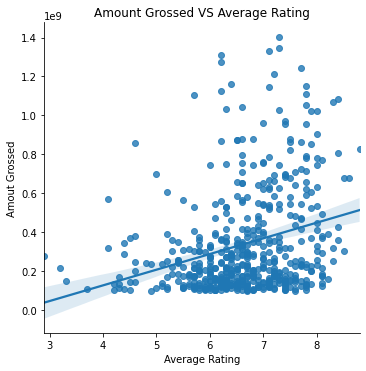

<Figure size 432x288 with 0 Axes>

In [79]:
sns.lmplot(x='averagerating', y='total_gross', data=movies.drop(bad_movies.index))\
.set(xlabel='Average Rating', ylabel='Amout Grossed', title='Amount Grossed VS Average Rating')
#Plot of average rating against Total amount grossed
plt.show()
# plt.savefig('Total_grossed_vs_Average_Rating.png')

In [68]:
to_drop = ['numvotes', 'start_year', 'runtime_minutes']
good_genre_titles.groupby('genres').mean().reset_index().sort_values('averagerating', ascending=False).drop(to_drop, axis=1)
# Table to show which genres recieve the highest average rating.

,genres,averagerating
11,"Documentary,Music",7.450000
10,"Documentary,Drama",7.332517
9,Documentary,7.267410
2,"Biography,Documentary",7.221630
12,Drama,6.485542
4,"Comedy,Drama",6.368911
5,"Comedy,Drama,Romance",6.288870
13,"Drama,Romance",6.271695
8,"Crime,Drama,Thriller",6.121501
14,"Drama,Thriller",6.088060


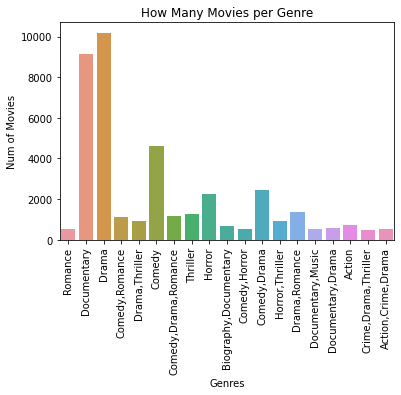

<Figure size 432x288 with 0 Axes>

In [78]:
sns.countplot(x='genres', data=good_genre_titles)\
.set(xlabel='Genres', ylabel='Num of Movies', title='How Many Movies per Genre')
plt.xticks(rotation=90);
# Count of how frequent each genre is.
plt.show()
# plt.savefig('Num_movies_per_genre.png')

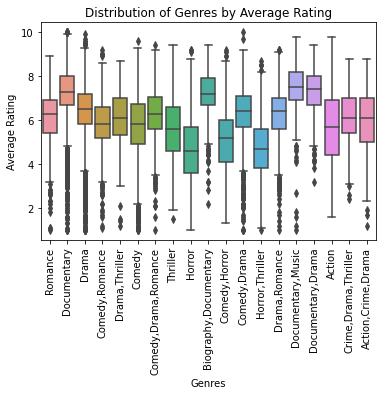

In [77]:
sns.boxplot(x="genres", y="averagerating", data=good_genre_titles)\
.set(xlabel='Genres', ylabel='Average Rating', title='Distribution of Genres by Average Rating')
plt.xticks(rotation=90);
plt.show()
# Display of the average ratings for each genre
# plt.savefig('average_ratings_per_genre.png')

## Evaluation
Evaluate how well your work solves the stated business problem.

***
* On average, the higher rating a movie gets the more money it makes. I have found that Documentaries recieve higher ratings as well as being the second most frequent movie genre. The best way to make money would to make a Documentary.
* My visualations fit my hypothesis rather well and I am confident that it would generalize beyond the data I have. This model will help Microsoft enter into the movie industry.
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
* Microsoft should enter the movie industry with a documentary. Documentaries are the second most frequent genre and the highest average rating. The sub-categories of documentaries are the second third and fourth highest average ratings.
* There are many more factors that go into a money making movie such as which actors and/or directors help the movie make the most money. In order to more accuartely predict one would have to answer such questions.
***